# Cyclistic data analysis

## Introduction
This is a capstone project for **Google Data Analytics** course. I used real-world data provided by a bike-sharing company in Chicago. The goal was to design marketing strategies aimed at converting casual riders into annual members.

* The final [__Cyclistic data analysis presentation__](https://docs.google.com/presentation/d/1dJFRqilNzjHMs279K3sWfbKWjDg61FYBVdgC7RNCG_w/edit?usp=sharing) is available at **Google Slides.** 
* Detailed documentation is available in [**Kaggle kernel**](https://www.kaggle.com/dmnorth/cyclistic-data-analysis-sql-excel-illustrator).
* **Microsoft Excel** has been used for the initial assessment of a portion of data. 
* Processing, cleaning, validation, and analysis were done in **SQLite Studio.**
* Further analysis was done in **Tableau Public** and can be viewed at [__Cyclistic Data Analysis Tableau__](https://public.tableau.com/app/profile/dmnorth/viz/CyclisticDataAnalysisTableau/select) project.
* Visualization and slideshow presentation was designed in **Adobe Illustrator**.

## 1. Ask
### 1.1 Problem
How to maximize the number of annual members to ensure future growth and increase profitability.

#### Analytical questions

* How do annual members and casual riders use Cyclistic bikes differently?
* Why would casual riders buy Cyclistic annual memberships?
* How can Cyclistic use digital media to influence casual riders to become members? 

### 1.2 Key findings
* Members seem to be using bicycles for work and other repeating activities, while casual riders use them more recreationally.
* Casual riders would buy a membership if they decide to change the way they use bicycles.

#### Digital media campaign recommendations

* Promote using bicycles for work commutes and other repeating trips.
* Encourage using bicycles for short convenience trips.
* Launch campaigns in Spring, Summer, and on weekends when casual riders are most active.

#### Further actions

* Launch digital media campaign based on given recommendations.
* Collect digital media campaign data for measuring the effects on conversion to membership.

Please see
[__Cyclystic data analysis presentation__](https://docs.google.com/presentation/d/1dJFRqilNzjHMs279K3sWfbKWjDg61FYBVdgC7RNCG_w/edit?usp=sharing).


## 2. Prepare
### 2.1 Data source
Data is provided by [Motivate International Inc.](https://divvy-tripdata.s3.amazonaws.com/index.html)
It is organized in zipped .csv files each representing one month of bicycle rides for the period of May 2020 - Apr 2021.
The data is obtained under the [following license](https://www.divvybikes.com/data-license-agreement). 

### 2.2 Data description
Identifiable user data is tokenized. The data provides starting and ending times, locations, as well as the type of ridership. This will be useful to analyze the occurring patterns of each rider type.

### 2.3 Data limitations
Since riders’ personally identifiable information is unavailable due to data-privacy issues it will be impossible to connect pass purchases to credit card numbers to determine if casual riders live in the Cyclistic service area or if they have purchased multiple single passes.

### 2.4 Data handling
The database is stored on a hard drive on a password-protected operating system and backed up to a cloud. To run SQLite3 in Kaggle kernel I converted original .csv files into a single .sqlite dataset. Since I couldn't clean, modify the original .sqlite dataset in this notebook, some of the code is presented as text and is not executable. I also uploaded a few extra files to make as much code executable as possible.

## 3. Process
### 3.1 Tools used
I started with **Microsoft Excel** since it is a very versatile tool. It quickly let me familiarize myself with the dataset, check formatting, minimum and maximum values, typos, and duplicates through the "Sort and filter" option. Furthermore, I created a pivot table with accompanying visualizations. Since Cyclistic combined dataset is more than 3.5M records and Excel is limited to around 1M records I proceeded to **SQLite Studio** to combine monthly tables.

### 3.2 Initial assessment in Microsoft Excel

* Downloaded all the original data into …/data_cyclists/orgn
* Converted .csv files to .xslx and saved into …/data_cyclists/edit
* Checked each column and assigned datatypes such as custom `yyyy-mm-dd hh:mm:ss` for **started_at**, **eneded_at** parameters, and **ride_length**
* Created and examined new columns: **ride_length** `(=D2-C2)`, **day_of_week** `(=WEEKDAY(C2,1))`
* Filtered first row, viewed through listed options of every column, screened through errors, duplicates, blanks, maximum and minimum values
* Calculated Average `(=AVERAGE(N2:N200275))`, `Maximum(=MAX(N2:N200275))`, and `Median(=MEDIAN(N2:N200275))` values for **ride_length**, Average, Median and Mode `(=MODE.SNGL(O2:O200275))` for **day_of_week**.

#### 3.2.1 Investigating errors
While checking filtered values of **ride_length** detected some errors. After filtering them it turned out that some **ended_at** dated are less than or equal to **started_at** which should not be possible. Made a note to further investigate in SQLite.

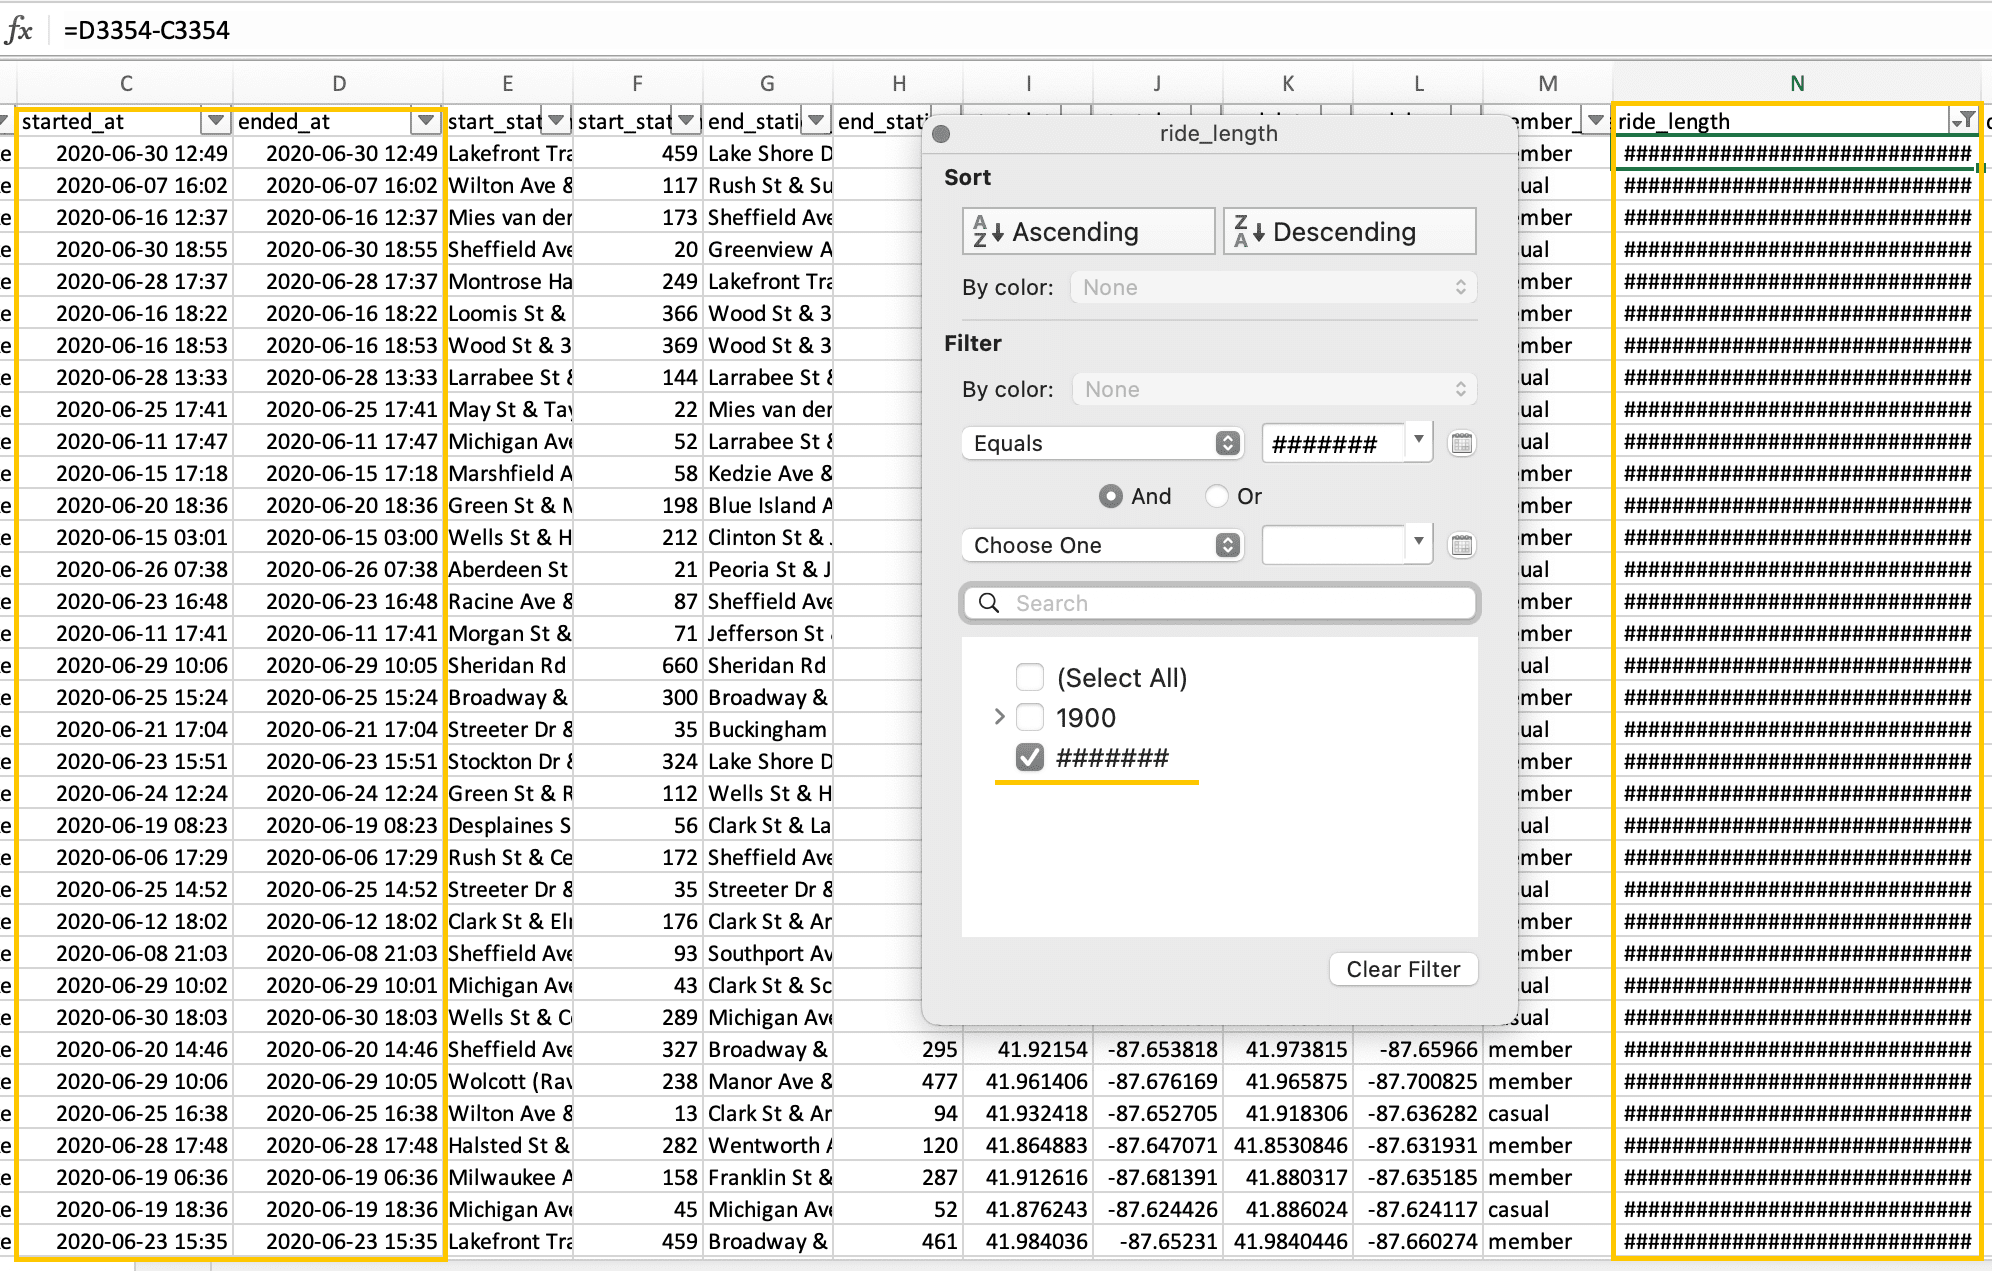

#### 3.2.2 Calculations analysis
Maximum **ride_length** was more than 20 days. The average **ride_length** of 33 min is longer than the median **ride_length** of 19 min, which means that there is a smaller number of very long rides that skews the average.

Median **day_of_week** is on Thursday (5), and mode on Saturday (7), which means, that more rides happen on Fridays and Saturdays than on other days.

### 3.3 Processing with SQLite
I chose to work with **SQLite Studio** because it's free, easy to install and run, and executes queries quickly.

#### 3.3.1 Setting up and testing
Importing essential libraries to run SQLite3 in Python.

In [ ]:
# Import libraries needed for working with SQLite3
import sqlite3
import pandas as pd

I uploaded .sqlite dataset with original tables as well as a dataset with newly created tables for demonstration purposes. Here I am specifying the paths. 

In [ ]:
# Specify pathway to .sqlite database
conx = sqlite3.connect('../input/divvytripsdata/divvytripsdata.sqlite')
cony = sqlite3.connect('../input/divvytripsdataedit/divvytripsdata-edit.sqlite')

Now for testing purposes let us view the first 5 rows of a table.

In [ ]:
# Test the environment, viewing a table
pd.read_sql('''
    SELECT *
    FROM divvy202005
    LIMIT 5;
''', con=conx)

And let's check the table structure.

In [ ]:
#Test table structure
pd.read_sql('''
--Test table structure
PRAGMA table_info(divvy202005);
''', con=conx)

Everything is looking good, so let's proceed.

#### 3.3.2 Create a new table
Instead of working with each of the 12 tables separately, I decided to combine them all in one for convenience. Here I am creating a new table with the same structure as the original tables. I am assigning `DATETIME` datatype for **started_at** and **ended_at** columns.

*#Create empty table MAINdivvy with the original table structure*
```
CREATE TABLE MAINdivvy (
ride_id,
rideable_type,
started_at	DATETIME,
ended_at	DATETIME,
start_station_name,
start_station_id,
end_station_name,
end_station_id,
start_lat,
start_lng,
end_lat,
end_lng,
member_casual
);
```

Now that the new table **MAINdivvy** is created I am simply copying all the data from 12 tables into it.

*#Combine all tables into one*
```
INSERT INTO MAINdivvy SELECT * FROM divvy202005;
INSERT INTO MAINdivvy SELECT * FROM divvy202006;
INSERT INTO MAINdivvy SELECT * FROM divvy202007;
INSERT INTO MAINdivvy SELECT * FROM divvy202008;
INSERT INTO MAINdivvy SELECT * FROM divvy202009;
INSERT INTO MAINdivvy SELECT * FROM divvy202010;
INSERT INTO MAINdivvy SELECT * FROM divvy202011;
INSERT INTO MAINdivvy SELECT * FROM divvy202012;
INSERT INTO MAINdivvy SELECT * FROM divvy202101;
INSERT INTO MAINdivvy SELECT * FROM divvy202102;
INSERT INTO MAINdivvy SELECT * FROM divvy202103;
INSERT INTO MAINdivvy SELECT * FROM divvy202104;
```

Doublechecking the table structure.

In [ ]:
#Double check table structure
pd.read_sql('''
PRAGMA table_info(MAINdivvy);
''', con=cony)

I now have a single table **MAINdivvy** with 3.7M records. Let's move on to the analysis.

## 4. Analyze
### 4.1 PivotTable in Microsoft Excel
* Selected the whole table and Inserted it as PivotTable to the new sheet
* Inserted PivotChart to assist with visualization
* Experimented with the parameters in Pivot table, created:

 * Number of rides by user type. Columns: **member_casual**, Values: **Count of ride_id**
 * Average ride length by user type. Columns: **member_casual**, Values: **Average of ride_length**
 * Average ride length by day of the week and by user type. Columns: **member_casual**, Rows: **day_of_week**, Values: **Average of ride_length**
 * Number of rides by day of the week and by user type. Columns: **member_casual**, Rows: **day_of_week**, Values: **Count of ride_id**
 
On this chart for example we can see that casual riders are most active on Fridays and weekends, while members ride regularly during the weekends.

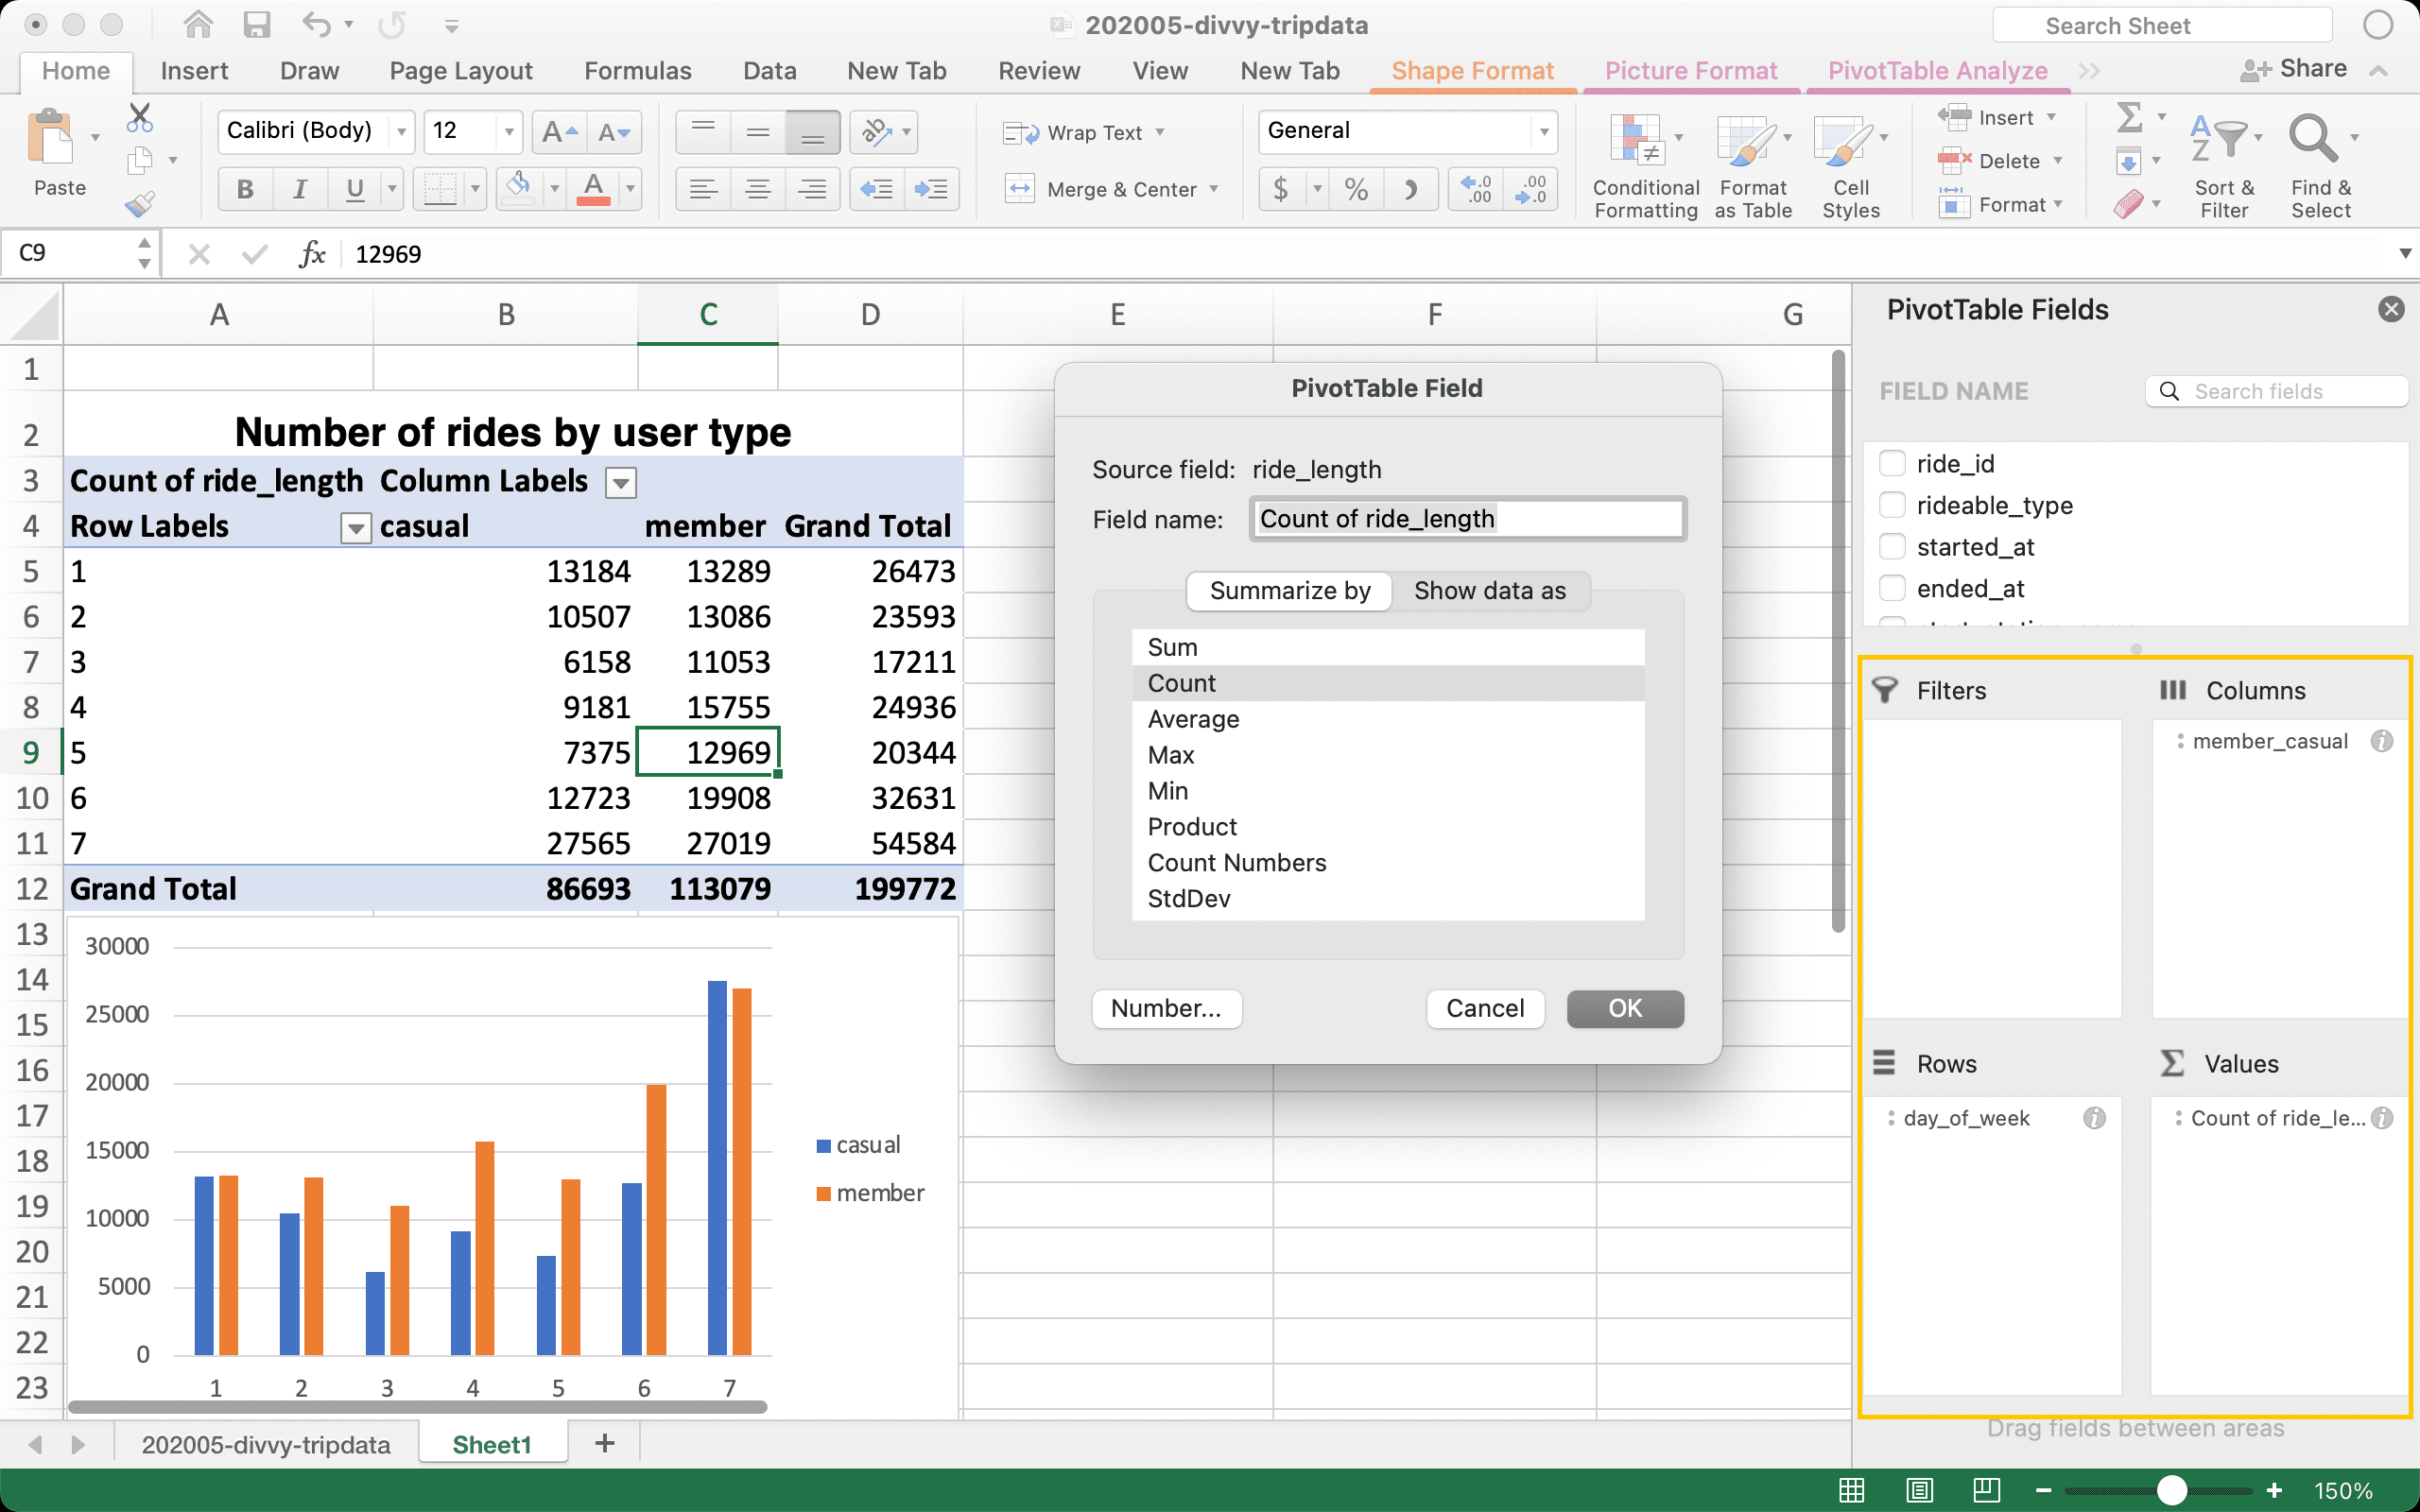

### 4.2 Analysis in SQLite
First I want to make sure there are no empty spaces in the **started_at** and **ended_at** columns since I am going to use them for main calculations.

In [ ]:
#Counting empty spaces of started_at
pd.read_sql('''
SELECT COUNT(*) AS started_at_empty_spaces
FROM MAINdivvy
WHERE started_at = '';
''', con=cony)

In [ ]:
#Counting empty spaces of ended_at
pd.read_sql('''
SELECT COUNT(*) AS ended_at_empty_spaces
FROM MAINdivvy
WHERE ended_at = '';
''', con=cony)

Since counting empty spaces results in 0 instances there are no empty spaces in those columns.

Now I want to check if there are instances where trip duration is less than or equals 0 sec. For that, I am subtracting **started_at** from **ended_at** columns and converting them to Unix epoch time in seconds.

In [ ]:
#Find instances where duration is less than or equal to zero
#Found 411 records with duration is 0 and 10,506 records where it is  < 0
pd.read_sql('''
SELECT
    started_at,
    ended_at,
    STRFTIME('%s', ended_at) - STRFTIME('%s', started_at) AS ride_length
FROM MAINdivvy
WHERE STRFTIME('%s', ended_at) - STRFTIME('%s', started_at) <= 0
ORDER BY ride_length;
''', con=cony)

The result is 10K+ instances. Since they represent roughly 0.3% of the dataset I decided to delete them. Next, I am deleting rows where duration is less than or equal to zero.

*#Deleting all rows where duration is less than or equal to zero*
```
DELETE *
FROM MAINdivvy
WHERE STRFTIME('%s', ended_at) - STRFTIME('%s', started_at) <= 0;
```

Since **ride_id** records are tokenized there should not be repeating instances. Here I am checking for duplicate **ride_id** by comparing the number of **total_ride_id** and the number of **distinct_ride_id**.

In [ ]:
#Count rows in agreggated table
pd.read_sql('''
SELECT
    COUNT (ride_id) AS 'total_ride_id',
    COUNT (DISTINCT ride_id) AS 'distinct_ride_id'
FROM MAINdivvy2;
''', con=cony)

Since the numbers are equal there are no **ride_id** duplicates.

Now I want to add a few computed columns to the table for further analysis. Here I am creating a new empty table MAINdivvy2 with the same structure and 3 additional columns for computing.

```
CREATE TABLE MAINdivvy2 (
ride_id,
rideable_type,
started_at	DATETIME,
ended_at	DATETIME,
start_station_name,
start_station_id,
end_station_name,
end_station_id,
start_lat,
start_lng,
end_lat,
end_lng,
member_casual,
ride_length DATETIME,
ride_length_timedate DATETIME,
day_of_week 
);
```

Copying **MAINdivvy** table while calculating three additional columns:
* **ride_length:** Difference between *ended_at* and *started_at* in seconds
* **ride_length_timedate:** *ride_length* converted to *Unix epoch time*.
* **day_of_week:** Day of a week of *started_at*

```
INSERT INTO MAINdivvy2 SELECT
    ride_id,
    rideable_type,
    started_at,
    ended_at,
    start_station_name,
    start_station_id,
    end_station_name,
    end_station_id,
    start_lat,
    start_lng,
    end_lat,
    end_lng,
    member_casual,
    STRFTIME('%s', ended_at) - STRFTIME('%s', started_at) AS ride_length,
    DATETIME((STRFTIME('%s', ended_at) - STRFTIME('%s', started_at)), 'unixepoch') AS ride_length_timedate,
    STRFTIME('%w', started_at) AS day_of_week
    FROM MAINdivvy;
```

Let's check for top 5 shortest and longest rides.

In [ ]:
#Check top 5 shortest rides
pd.read_sql('''
SELECT
    ride_id,
    started_at,
    ended_at,
    member_casual,
    ride_length,
    ride_length_timedate,
    day_of_week
FROM MAINdivvy2 ORDER BY ride_length LIMIT 5;
''', con=cony)

In [ ]:
#Check top 5 longest rides
pd.read_sql('''
SELECT
    ride_id,
    started_at,
    ended_at,
    member_casual,
    ride_length,
    ride_length_timedate,
    day_of_week
FROM MAINdivvy2 ORDER BY ride_length DESC LIMIT 5;
''', con=cony)

As we can see the shortest rides are about 1 sec and the longest rides are around 2 months. This would be a good time to speak with the staff to help determine how to set a cutoff for the shortest and longest rides. In the comments to the original dataset, it is stated that rides lasting 60 sec or less are probably not real rides so let's first select, then remove them.

In [ ]:
#Selecting all rides lasting under 60 sec.
pd.read_sql('''
SELECT * FROM MAINdivvy2 WHERE ride_length <= 60;
''', con=cony)

*#Deleting all rides lasting under 60 sec.*
```
DELETE * FROM MAINdivvy2 WHERE ride_length <= 60;
```

### 4.3 Analysis in Tableau

Now that the table is aggregated and cleaned I want to bring it to Tableau to quickly plot multiple graphs and charts and pick a few for to include in a slideshow presentation.

#### 4.3.1 Building charts in Tableau
To convert **ride_length** from seconds to minutes rounded to a single digit I am creating *New calculated column* with `ROUND([Ride Length]/60,1)` formula.

The charts I have built, which can be viewed in [__Cyclistic Data Analysis Tableau__](https://public.tableau.com/app/profile/dmnorth/viz/CyclisticDataAnalysisTableau/select) project include:

* Number of rides by membership type
* Average ride length by membership type
* Total minutes ridden by membership type
* Number of rides by day of the week, by membership type
* Average duration of rides by day of the week, by membership type
* Number of rides by month, by membership type
* Average duration of rides by month, by membership type

Here are the ones I am choosing for the visualization in **Adobe Illustrator**.

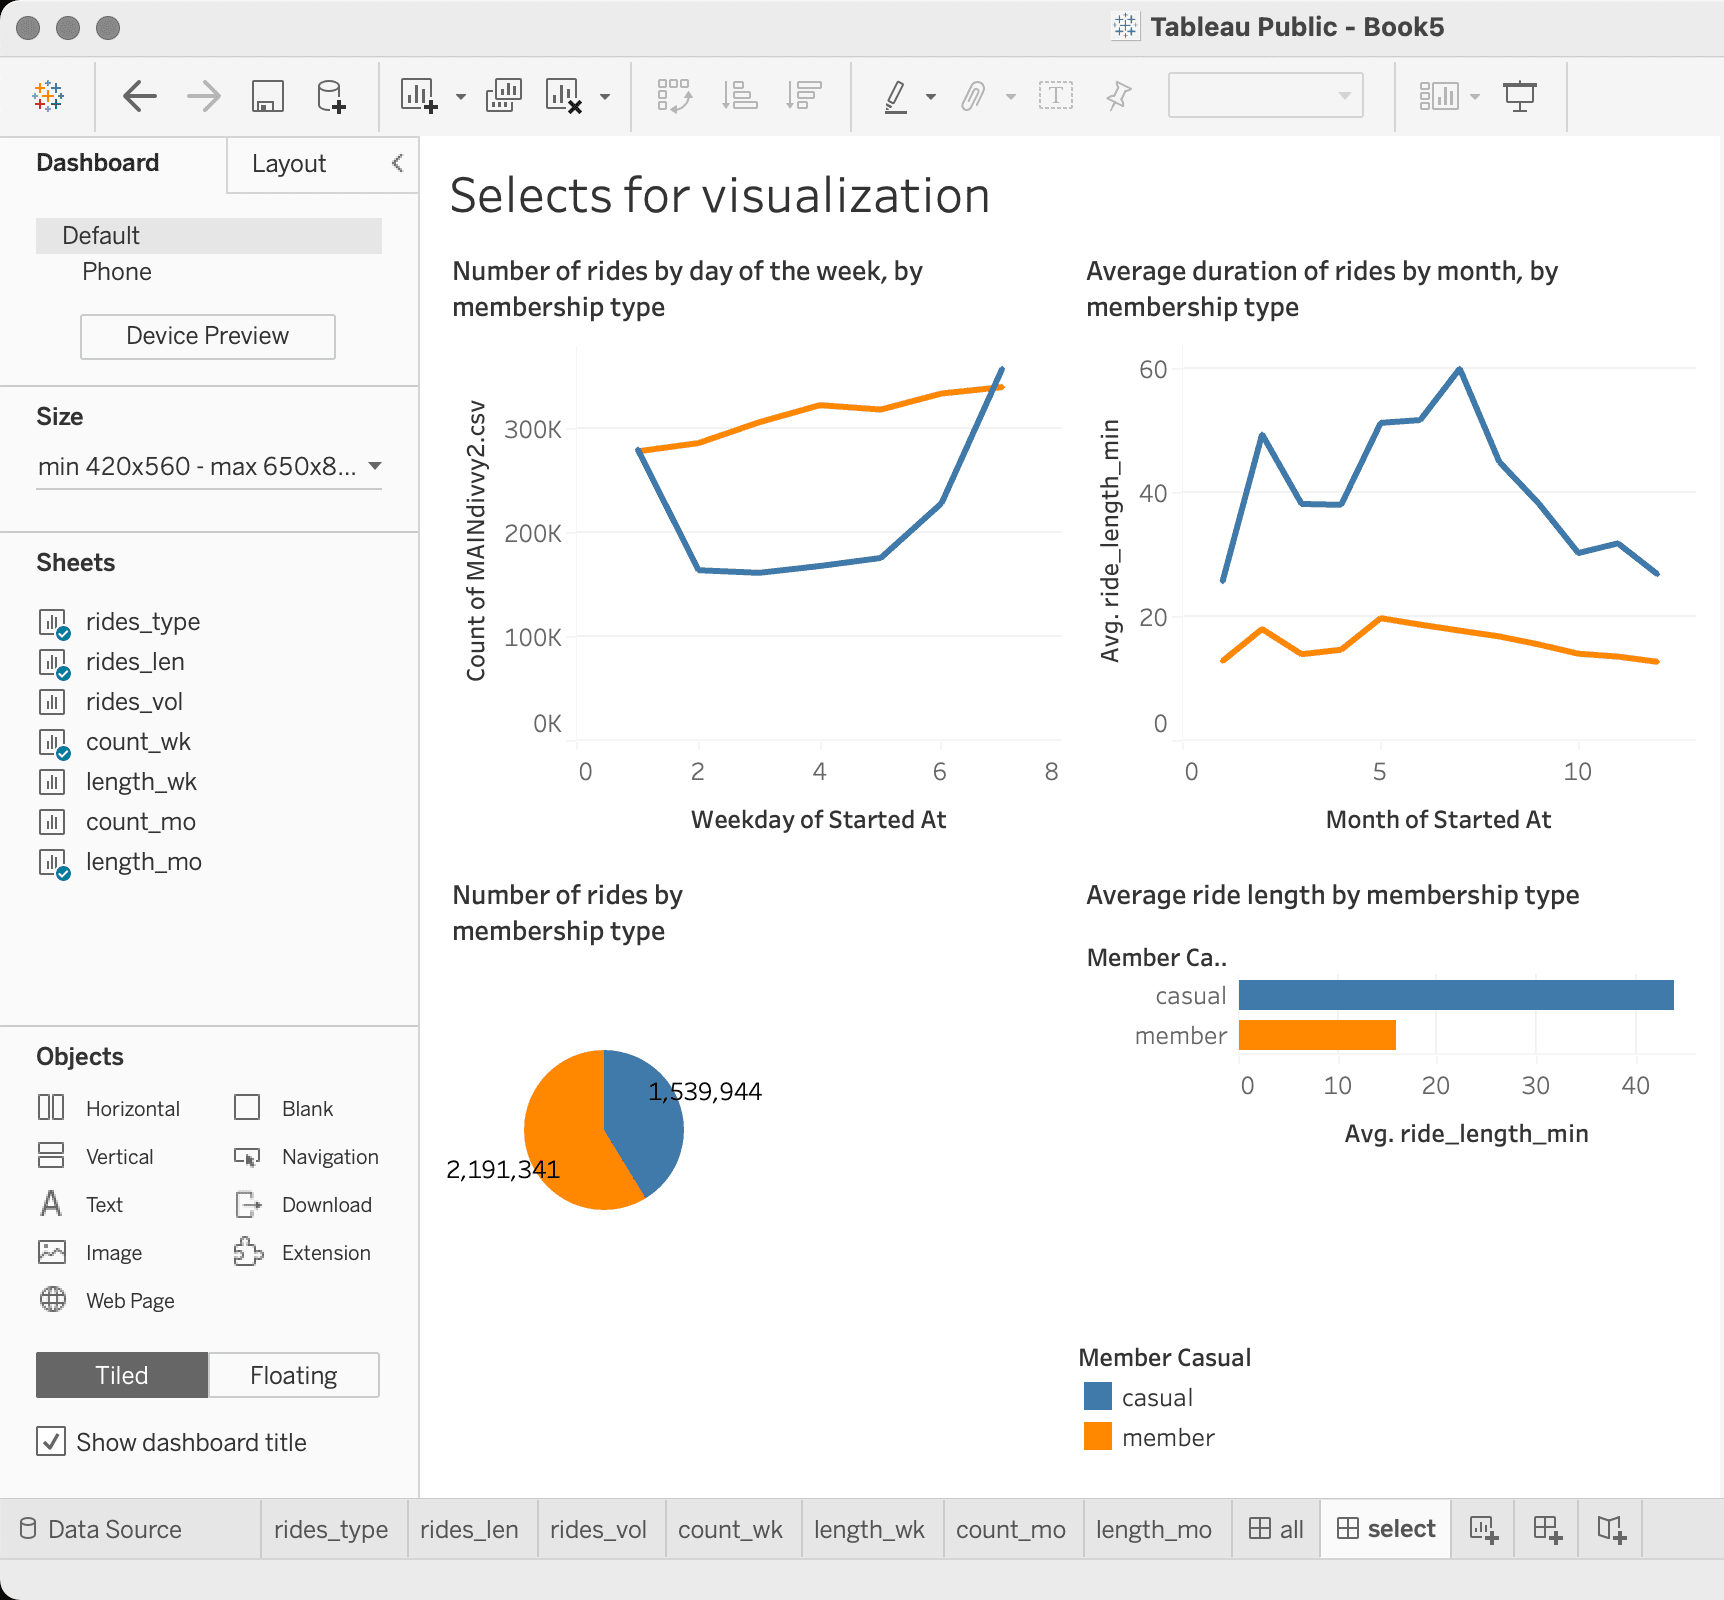

#### 4.3.2 Making sense of Tableau charts
I first noticed that while causal riders are responsible for a smaller number of rides, they ride significantly longer on average. Once I broke down those parameters by day of the week and by month, the trend started to emerge. While members ride fairly regularly both in terms of the number of rides and in terms of duration, casual riders ride much more often on weekends relative to weekdays and in the Summer season relative to the Winter season. I made my conclusion and recommendations based on these findings.

## 5. Share
I am choosing to present my findings with a slideshow presentation since it can be quick and easy to comprehend. I am choosing **Adobe Illustrator** to prepare the slideshow because it supports importing via *Graph/Chart Tools* and gives me complete freedom and control of the final result.

### 5.1 Recreating tables in SQLite

Since **Tableau Public** does not allow me to export .csv files for selected visualizations I am going to recreate the underlying data in **SQLite Studio**.

Number of rides by membership type

In [ ]:
#Number of rides by membership type
pd.read_sql('''
SELECT
    member_casual,
    COUNT(ride_id) AS number_of_rides
FROM MAINdivvy2
GROUP BY member_casual;
''', con=cony)

Average ride length by membership type

In [ ]:
#Average ride length by membership type
pd.read_sql('''
SELECT
    member_casual,
    ROUND(AVG(ride_length)/60,1) AS avr_ride_length_min
FROM MAINdivvy2
GROUP BY member_casual;
''', con=cony)



Number of rides by weekday, by membership type

In [ ]:
#Number of rides by weekday, by membership type
pd.read_sql('''
SELECT
    day_of_week,
    member_casual,
    COUNT(ride_id) AS number_of_rides
FROM MAINdivvy2
GROUP BY day_of_week, member_casual
ORDER BY member_casual, day_of_week;
''', con=cony)

Average ride duration by month, by member type

In [ ]:
#Average ride duration by month, by member type
pd.read_sql('''
SELECT
    STRFTIME('%m', started_at) AS month,
    ROUND(AVG(ride_length/60),1) AS avg_ride_length_min,
    member_casual
FROM MAINdivvy2
GROUP BY month, member_casual
ORDER BY member_casual, month;
''', con=cony)

### 5.2 Importing into Adobe Illustrator
After exporting these tables to .csv files with tabulated separators I am importing them into **Adobe Illustrator** with:
* Column Graph Tool
* Line Graph Tool
* Pie Chart Tool

### 5.3 Slideshow presentation
This is how final visualizations look in the **Adobe Illustrator** interface.

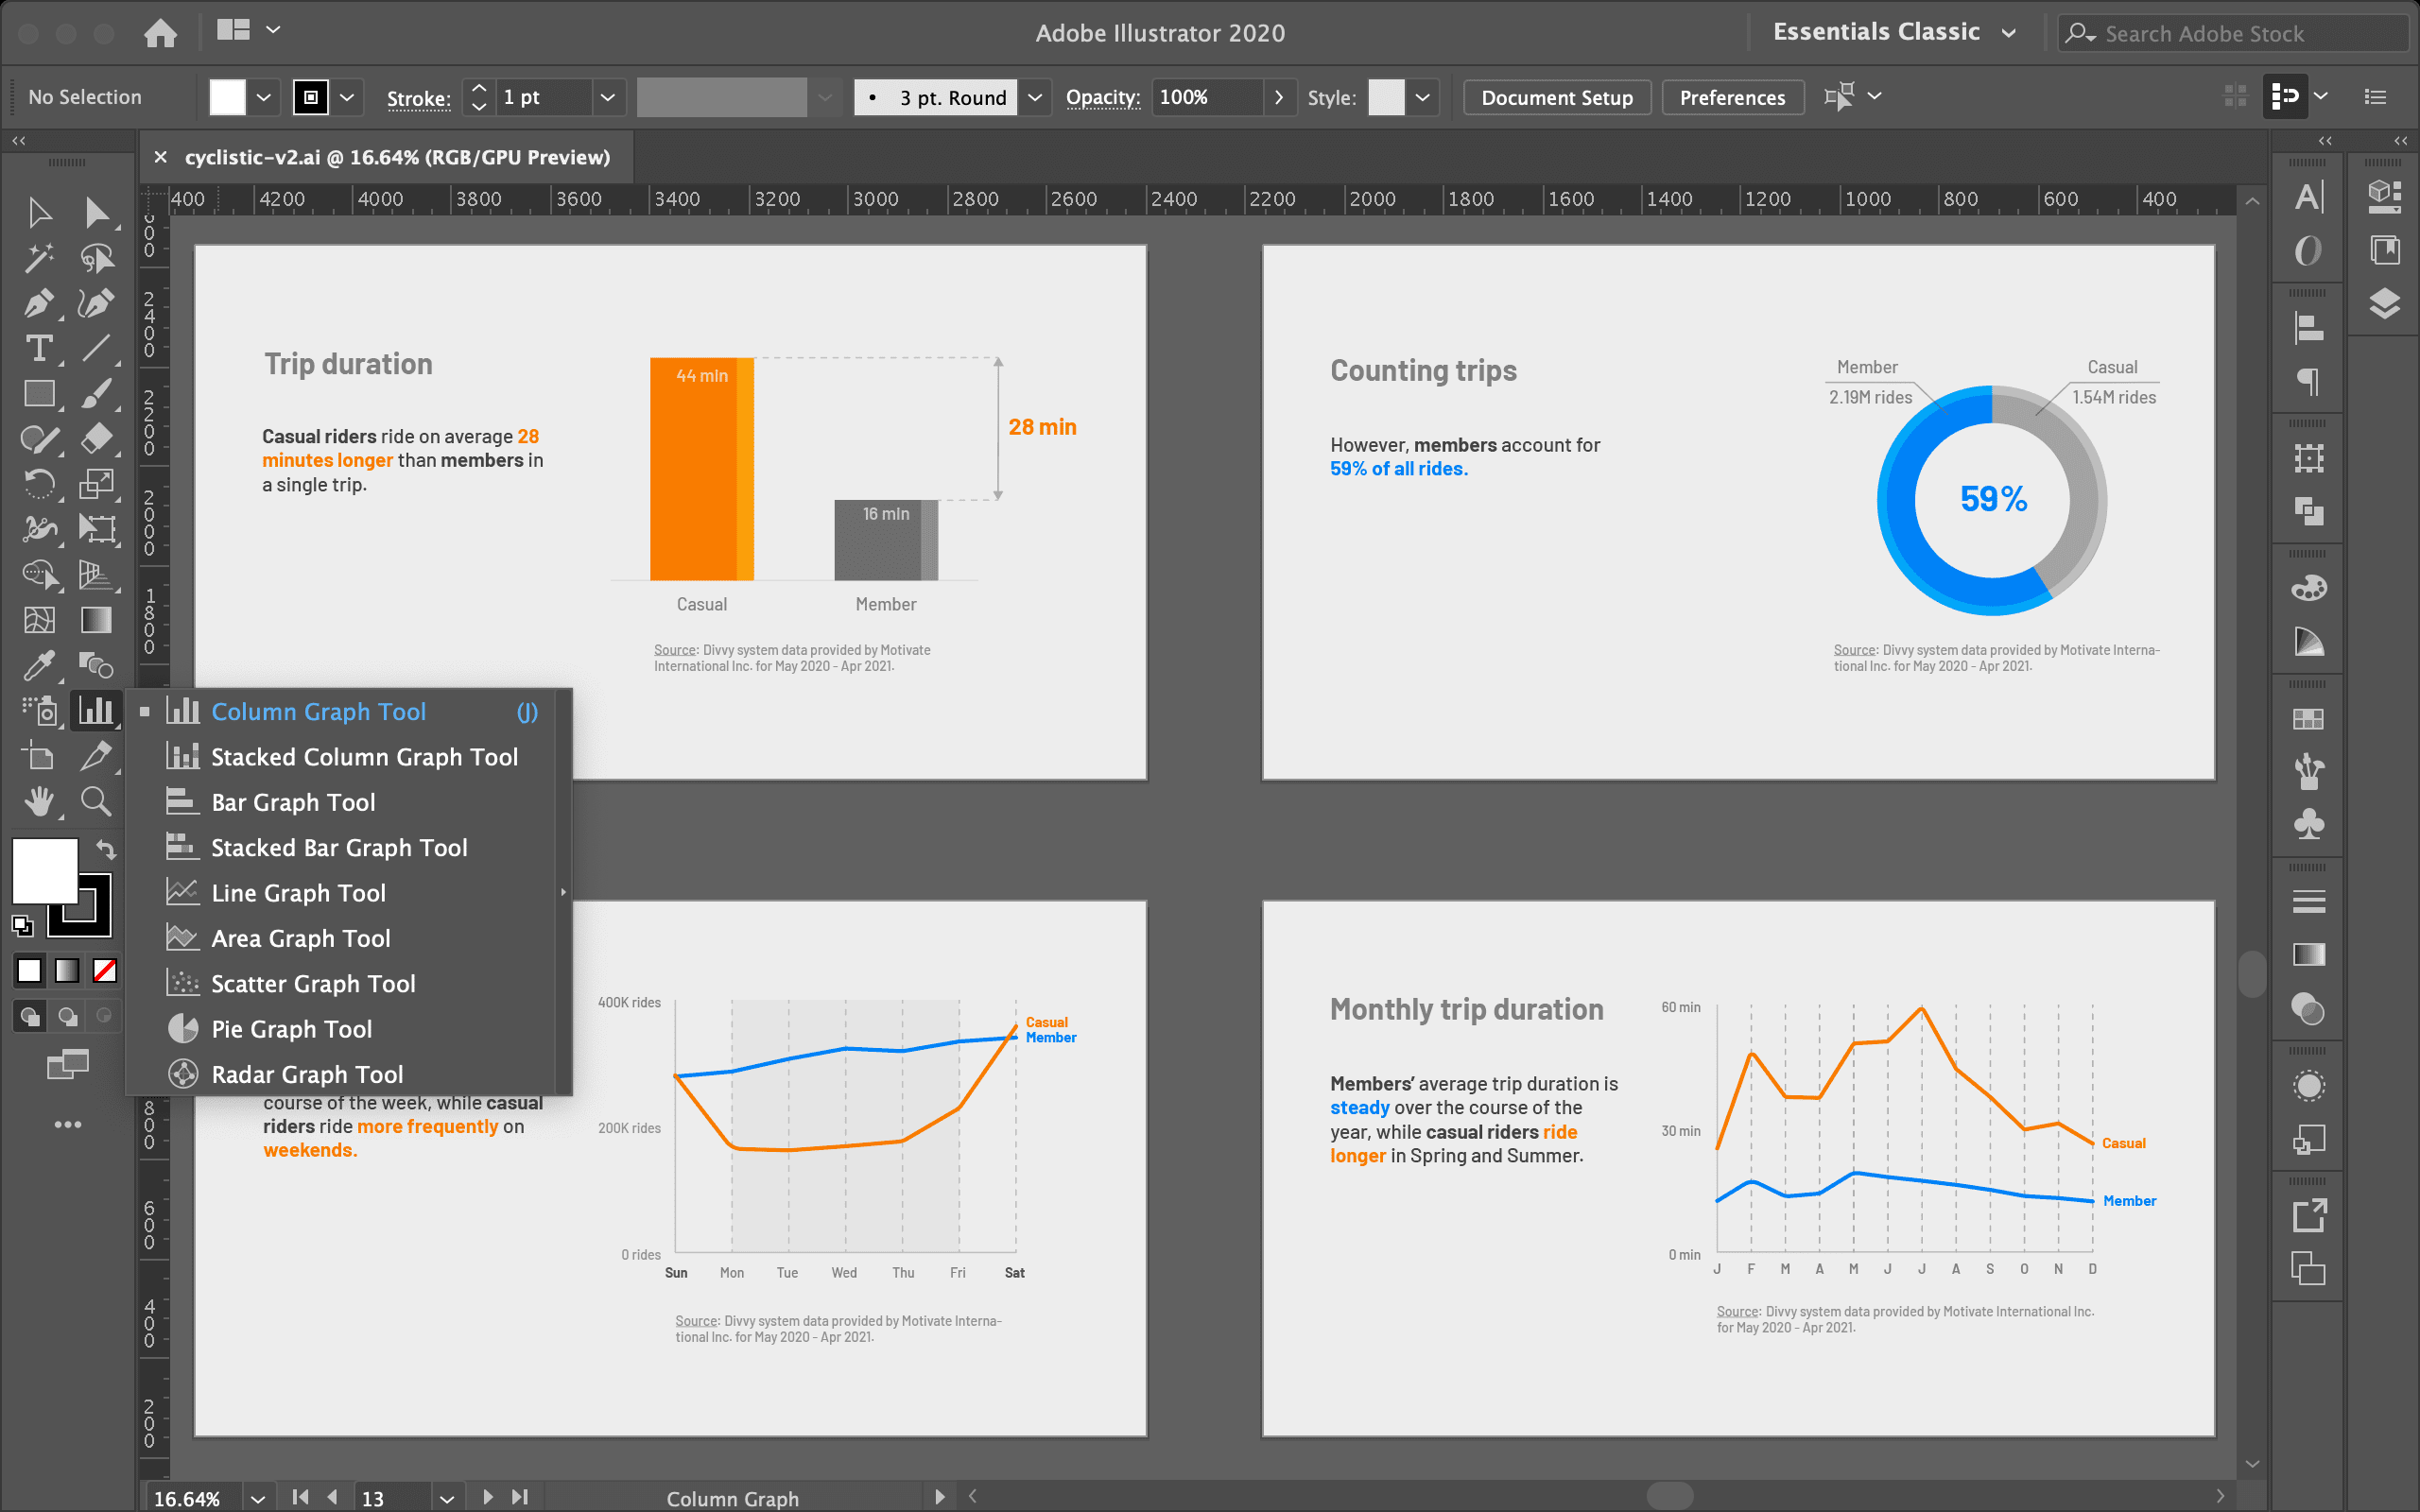

## 6. Act
The final [__Cyclystic data analysis presentation__](https://docs.google.com/presentation/d/1dJFRqilNzjHMs279K3sWfbKWjDg61FYBVdgC7RNCG_w/edit?usp=sharing) can be viewed in **Google Slides.**

### 6.1 Key findings
* Members seem to be using bicycles for work and other repeating activities, while casual riders use them more recreationally.
* Casual riders would buy a membership if they decide to change the way they use bicycles.

### 6.2 Digital media campaign recommendations

* Promote using bicycles for work commutes and other repeating trips.
* Encourage using bicycles for short convenience trips.
* Launch campaigns in Spring, Summer, and on weekends when casual riders are most active.

### 6.3 Further actions

* Launch digital media campaign based on given recommendations.
* Collect digital media campaign data for measuring the effects on conversion to membership.